<a href="https://colab.research.google.com/github/SujitKhatiwada/Neural-Networks-and-Deep-Learning-Group-7/blob/main/weed_detection_maskrcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Weed Detection using MaskedRCNN
We have implemented image processing using MaskRCNN to detect weed area in an image.

In [ ]:
! pip install tensorflow #Version-2.9.2
! pip install keras #Version 2.9
# Two important frameworks for this project

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
! git clone https://github.com/matterport/Mask_RCNN.git 
#! git clone https://github.com/akTwelve/Mask_RCNN.git  
# mrcnn module inside Mask_RCNN directory,drag mrcnn module out
# Inorder to avoid the runt time issues on Layers and Engine in latest Tensorflow and Keras I had to use alternative to matterport/Mask_RCNN

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 137.67 MiB | 14.40 MiB/s, done.
Resolving deltas: 100% (558/558), done.


In [2]:
!wget https://github.com/AjinJayan/weed_detection/raw/master/dataset.zip
!unzip -q /content/dataset.zip
# This dataset consists of 202 images in which 183 images were used for training and 19 images for validation. 
# Since we are going to train an instance segmentation model that should have pixel level accuracy 
# it's important to annotate the images properly and VGG Image Annotator tool was used for this purpose.

--2022-12-16 20:15:48--  https://github.com/AjinJayan/weed_detection/raw/master/dataset.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AjinJayan/weed_detection/master/dataset.zip [following]
--2022-12-16 20:15:48--  https://raw.githubusercontent.com/AjinJayan/weed_detection/master/dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78124242 (75M) [application/zip]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>]  74.50M   215MB/s    in 0.3s    

2022-12-16 20:15:49 (215 MB/s) - ‘dataset.zip’ saved [78124242/78124242]



In [3]:
!wget https://github.com/SujitKhatiwada/Neural-Networks-and-Deep-Learning-Group-7/raw/main/weed_training.py

--2022-12-16 20:18:22--  https://github.com/AjinJayan/weed_detection/raw/master/weed.py
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AjinJayan/weed_detection/master/weed.py [following]
--2022-12-16 20:18:22--  https://raw.githubusercontent.com/AjinJayan/weed_detection/master/weed.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14026 (14K) [text/plain]
Saving to: ‘weed.py’

weed.py             100%[===================>]  13.70K  --.-KB/s    in 0.001s  

2022-12-16 20:18:23 (21.3 MB/s) - ‘weed.py’ saved [14026/14026]



In [4]:
!git clone https://github.com/waleedka/coco
!pip install Cython
!pip install coco-sdk
!pip install utils
!pip install -U setuptools
!pip install -U wheel
!make install -C coco/PythonAPI
# inorder to avoid the keras issue https://github.com/matterport/Mask_RCNN/issues/2783

Cloning into 'coco'...
remote: Enumerating objects: 904, done.
remote: Total 904 (delta 0), reused 0 (delta 0), pack-reused 904
Receiving objects: 100% (904/904), 10.39 MiB | 25.44 MiB/s, done.
Resolving deltas: 100% (539/539), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 5.1 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
make: Entering directory '/content/coco/PythonAPI'
# install pycocotools to the Python site-packages
python setup.py build_ext install
Compiling pycocotools/_mask.pyx because it changed.
[1/1] Cythonizing pycocotools/_mask.pyx
/usr/local/lib/python3.8/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/coco/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
../common/maskApi.c: In function ‘rleDecode’:
../common/maskApi.c:46:7: warning: this ‘for’ clause does not guard... [-Wmisleading-indentation]
       for( k=0; k<R[i].cnts[j]; k++ ) *(M++)=v; v=!v; }}
       ^~~
../common/maskApi.c:46:49: note: ...this statement, but the latter is misleadingly indented as if it were guarded by the ‘for’
       for( k=0; k<R[i].cnts[j]; k++ ) *(M++

In [5]:
! pip uninstall scikit-image
! pip install scikit-image==0.16.2 
# For fixing warning issue during training
# Input image dtype is bool. Interpolation is not defined with bool data type

Found existing installation: scikit-image 0.18.3
Uninstalling scikit-image-0.18.3:
  Would remove:
    /usr/local/bin/skivi
    /usr/local/lib/python3.8/dist-packages/scikit_image-0.18.3.dist-info/*
    /usr/local/lib/python3.8/dist-packages/scikit_image.libs/libgomp-3300acd3.so.1.0.0
    /usr/local/lib/python3.8/dist-packages/skimage/*
Proceed (y/n)? y
  Successfully uninstalled scikit-image-0.18.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 26.5 MB 1.4 MB/s 



We use the pretrained weight that model has learned on this datasets and used to train with our own datasets.

In [ ]:
!python3 weed.py train --dataset=/content/dataset --weights=coco   # RUN TO TRAIN THE MODEL

Using TensorFlow backend.
Weights:  coco
Dataset:  /content/dataset
Logs:  /logs

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1

Code and visualizations to test, debug, and evaluate the Mask R-CNN model.

In [1]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

import weed

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
# WEED_WEIGHTS_PATH = "/content/mask_rcnn_weed_0040.h5"
# Path to Weed trained weights, can be found in logs directory after TRAINING THE MODEL

WEED_WEIGHTS_PATH = "/logs/weed20221216T0406/mask_rcnn_weed_0005.h5"  

/content/mrcnn/model.py:2363: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if os.name is 'nt':


Configurations

In [2]:
config = weed.CustomConfig()
WEED_DIR = "/content/dataset"

In [3]:
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

Notebook Preferences

In [4]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

In [5]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

Load Validation Dataset

In [6]:
# Load validation dataset
dataset = weed.CustomDataset()
dataset.load_custom(WEED_DIR, "val")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

Images: 19
Classes: ['BG', 'weed']


Load Model

In [7]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

Instructions for updating:
box_ind is deprecated, use box_indices instead
Instructions for updating:
Use fn_output_signature instead
Instructions for updating:
Use `tf.cast` instead.


In [8]:
# Set path to Weed weights file
#Path to Weed trained weights, can be found in logs directory after TRAINING THE MODEL
#                      OR 
# download the weights from the link and upload to google drive 
#weights_path = "/content/mask_rcnn_weed_0040.h5"

weights_path = "/logs/weed20221216T0406/mask_rcnn_weed_0005.h5"

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  /content/mask_rcnn_weed_0040.h5


Run Detection

image ID: weed.189.jpg (6) /content/dataset/val/189.jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
gt_class_id              shape: (2,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (2, 4)                min:  136.00000  max: 1022.00000  int32
gt_mask                  shape: (1024, 1024, 2)       min:    0.00000  max:    1.00000  bool


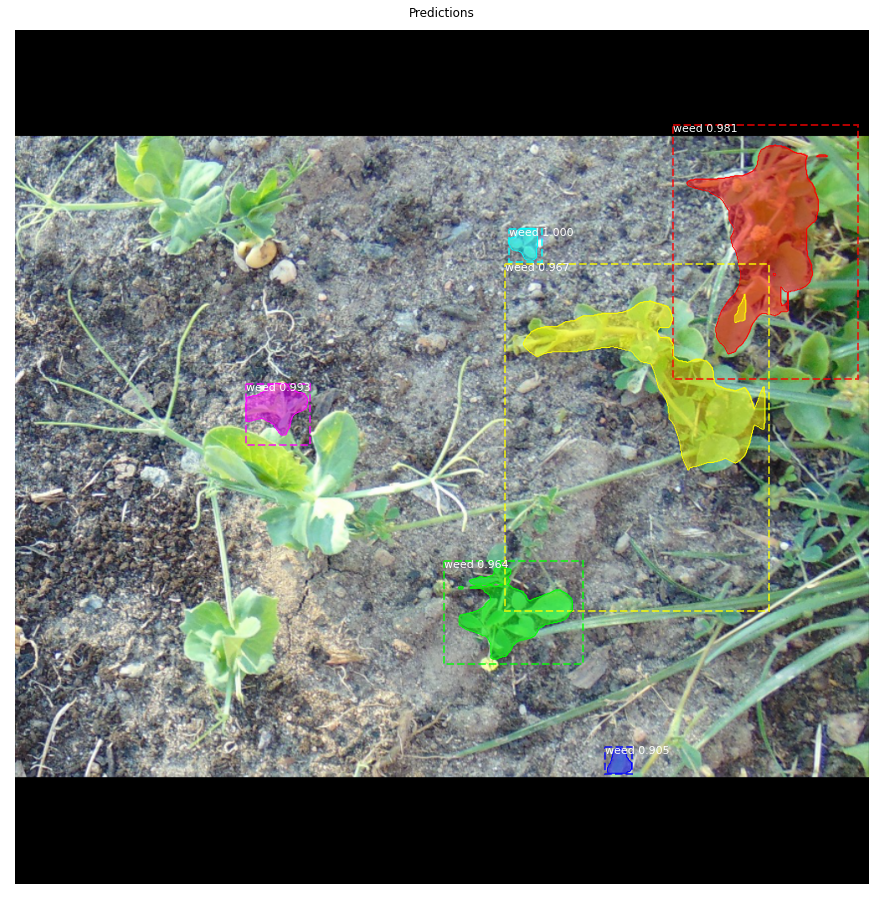

In [10]:
image_id = random.choice(dataset.image_ids)    # RUN CELL AGAIN FOR NEW IMAGES 
image, image_meta, gt_class_id, gt_bbox, gt_mask = modellib.load_image_gt(dataset, config, image_id)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

Color Splash

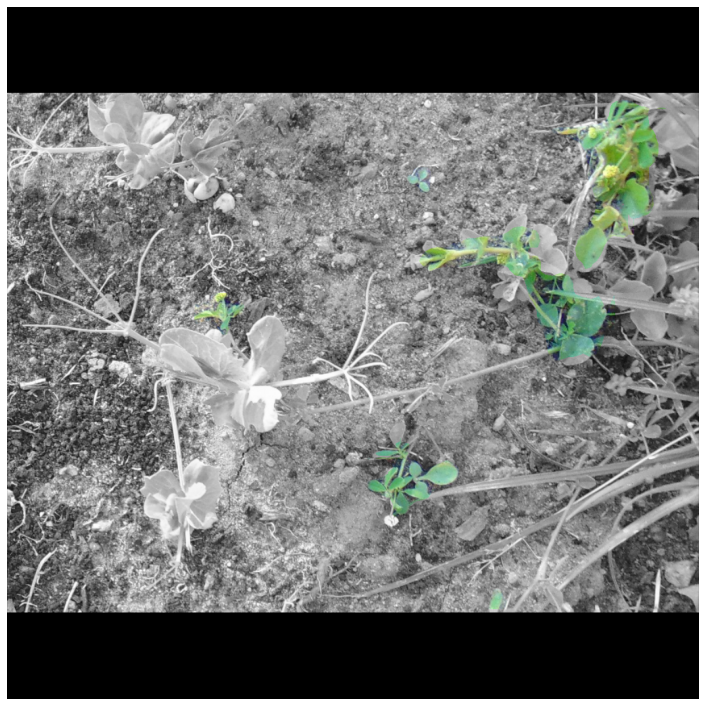

In [11]:
splash = weed.color_splash(image, r['masks'])
display_images([splash], cols=1)

# Step by Step Prediction
RPN Targets

In [12]:
# Generate RPN trainig targets
# target_rpn_match is 1 for positive anchors, -1 for negative anchors
# and 0 for neutral anchors.
target_rpn_match, target_rpn_bbox = modellib.build_rpn_targets(
    image.shape, model.anchors, gt_class_id, gt_bbox, model.config)
log("target_rpn_match", target_rpn_match)
log("target_rpn_bbox", target_rpn_bbox)

positive_anchor_ix = np.where(target_rpn_match[:] == 1)[0]
negative_anchor_ix = np.where(target_rpn_match[:] == -1)[0]
neutral_anchor_ix = np.where(target_rpn_match[:] == 0)[0]
positive_anchors = model.anchors[positive_anchor_ix]
negative_anchors = model.anchors[negative_anchor_ix]
neutral_anchors = model.anchors[neutral_anchor_ix]
log("positive_anchors", positive_anchors)
log("negative_anchors", negative_anchors)
log("neutral anchors", neutral_anchors)

# Apply refinement deltas to positive anchors
refined_anchors = utils.apply_box_deltas(
    positive_anchors,
    target_rpn_bbox[:positive_anchors.shape[0]] * model.config.RPN_BBOX_STD_DEV)
log("refined_anchors", refined_anchors, )


target_rpn_match         shape: (261888,)             min:   -1.00000  max:    1.00000  int32
target_rpn_bbox          shape: (256, 4)              min:   -3.31456  max:    3.75650  float64
positive_anchors         shape: (7, 4)                min:  192.00000  max: 1013.01934  float64
negative_anchors         shape: (249, 4)              min:  -64.00000  max: 1042.62742  float64
neutral anchors          shape: (261632, 4)           min: -362.03867  max: 1322.03867  float64
refined_anchors          shape: (7, 4)                min:  136.00000  max: 1022.00000  float32


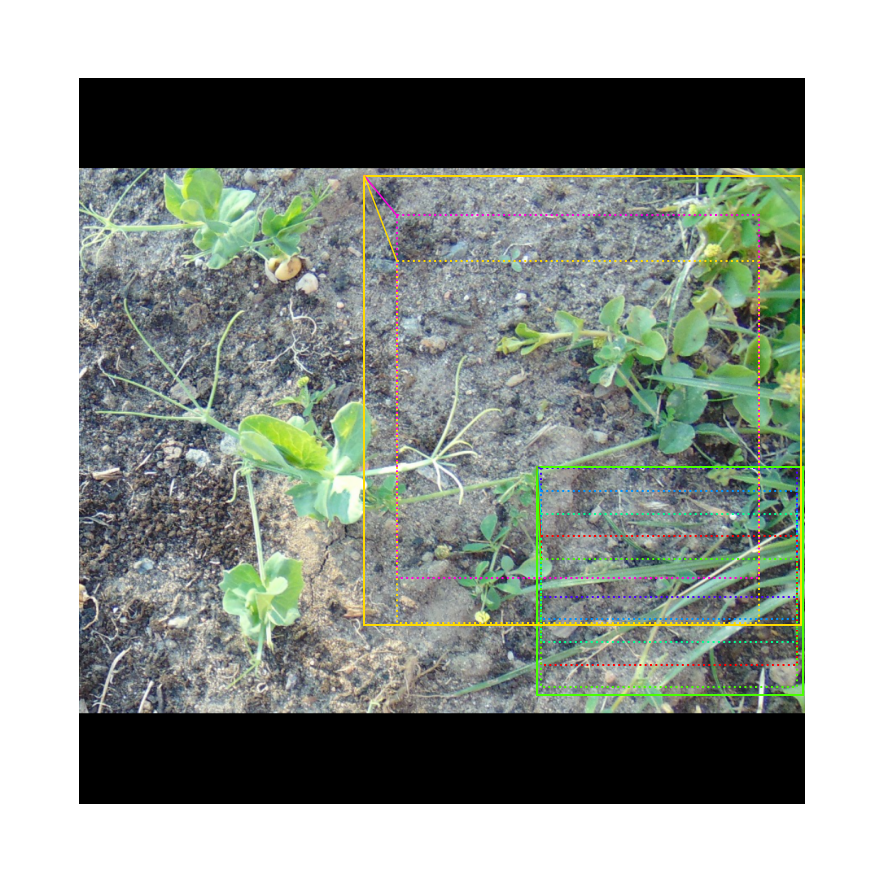

In [13]:
# Display positive anchors before refinement (dotted) and
# after refinement (solid).
visualize.draw_boxes(image, boxes=positive_anchors, refined_boxes=refined_anchors, ax=get_ax())

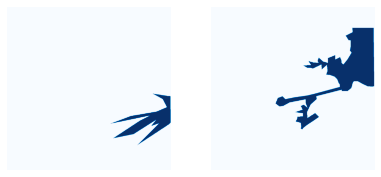

In [20]:
display_images(np.transpose(gt_mask, [2, 0, 1]), cmap="Blues")

# Results
-> We used a dataset consisting of 202 images in which 183 images were used for training and 19 images for validation.

-> It took around 44 minutes for 10 epochs with each epoch having 100 training batches and threshold of 0.9 for prediction. Training loss of  0.98 and validation loss of 1.43.

-> Color splash filter applied and corresponding mask on the weeds detected by the model

-> Our model did not achieved a decent amount of accuracy because of a small training dataset that we acquired and lack of enough computational power/GPU to increase the learning epochs.

# Limitations
-> The currently available coco dataset: mrcnn model.py has compatibility issues with the latest tensorflow and keras. Downgrading to lower version of python and tensorflow did not yield results as expected. 



# Lessons Learned

-> The prediction could have been improved by using 
   1. Region Proposal Network,
   2. Proposal Classification,
   3. Mask Generation and Activation

-> We have to Start Machine Learning Projects early because of it's everchanging hyperparameters usage, metrics and accuracy. 

-> The model can be further improved by gathering more datasets of various weed species and increasing the number of training iterations and image augmentation.